In [15]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
r=requests.get("https://classic.clinicaltrials.gov/api/query/full_studies")

In [5]:
url = 'https://clinicaltrials.gov/api/query/study_fields?'
params = '&expr=cancer+AND+AREA[CompletionDate]RANGE[2019,MAX]&min_rnk=1&max_rank=10&fmt=csv&NStudiesFound'
fields = '&fields=OverallStatus%2CCompletionDate%2CCompletionDateType%2CResultsFirstPostDate%2CPrimaryCompletionDate%2CDispFirstPostDate'
df = pd.read_csv(url + params + fields,skiprows=10)
df.colu

In [6]:
df

,Rank,OverallStatus,CompletionDate,CompletionDateType,ResultsFirstPostDate,PrimaryCompletionDate,DispFirstPostDate
0,1,Unknown status,"August 31, 2020",Anticipated,NaN,"June 30, 2020",NaN
1,2,Unknown status,June 2022,Anticipated,NaN,June 2021,NaN
2,3,Unknown status,"November 1, 2022",Anticipated,NaN,"November 1, 2021",NaN
3,4,Recruiting,December 2028,Anticipated,NaN,December 2028,NaN
4,5,Recruiting,"December 31, 2050",Anticipated,NaN,"December 31, 2050",NaN
5,6,Recruiting,"July 1, 2023",Anticipated,NaN,"July 1, 2023",NaN
6,7,Unknown status,"December 31, 2022",Anticipated,NaN,"December 31, 2022",NaN
7,8,Not yet recruiting,"December 31, 2024",Anticipated,NaN,"March 30, 2024",NaN
8,9,Recruiting,"July 1, 2024",Anticipated,NaN,"January 1, 2024",NaN
9,10,Unknown status,"March 31, 2022",Anticipated,NaN,"December 31, 2021",NaN


In [18]:
# the ammount of cancer clinical trials made ussing different types of endoscopies 
expr='cancer'
procedures= ["endoscopy", "colonoscopy","bronchoscopy","arthroscopy","cystoscopy","hysteroscopy"]
url='https://classic.clinicaltrials.gov/api/query/field_values?expr='
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
cancer_values=[]
for procedure in procedures:
    cancer_values.append(int(pd.read_xml(url+expr+search_elig_crit+procedure+search_date+params).NStudiesFound.dropna()))
cancer_values

[1859, 821, 226, 11, 187, 47]

[Text(0.5, 1.0, 'Cancer clinical trials')]

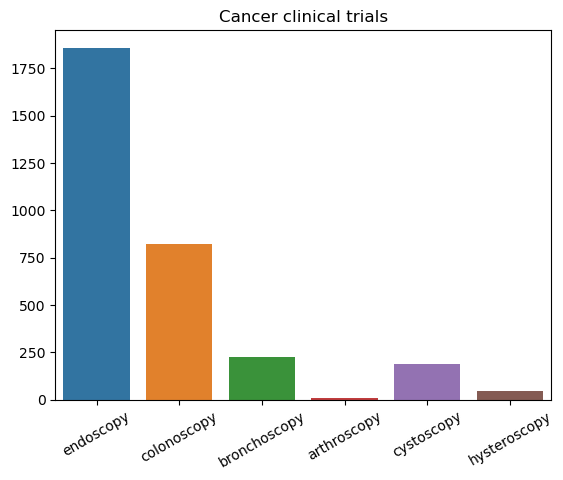

In [19]:
plot=sns.barplot(x=procedures, y=cancer_values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plot.set(title="Cancer clinical trials")

In [24]:
expr='ALL'
procedures= ["endoscopy", "colonoscopy","bronchoscopy","arthroscopy","cystoscopy","hysteroscopy"]
url='https://classic.clinicaltrials.gov/api/query/field_values?expr='
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
values=[]
for procedure in procedures:
    values.append(int(pd.read_xml(url+expr+search_elig_crit+procedure+search_date+params).NStudiesFound.dropna()))
values

[4055, 1526, 535, 474, 293, 231]

[Text(0.5, 1.0, 'All clinical trials')]

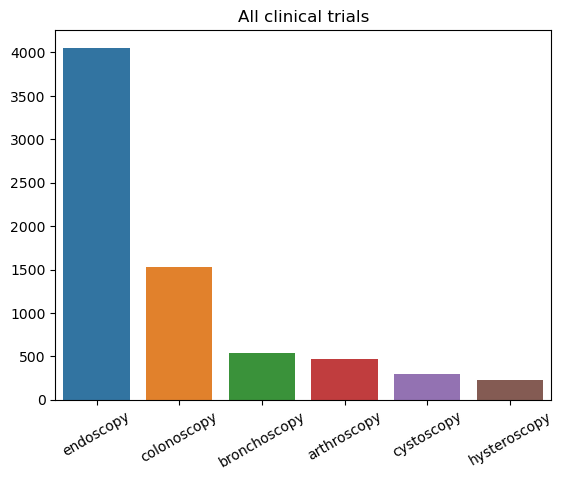

In [25]:
plot=sns.barplot(x=procedures, y=values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plot.set(title='All clinical trials')

In [27]:
#bronchoscopy
years= ["2015,2016","2017,2018","2019,2020","2021,2022","2023,2024"]
url='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search='+AND+SEARCH[Study](AREA[EligibilityCriteria]bronchoscopy+AND+AREA[CompletionDate]RANGE['
params='])&field=Condition&fmt=xml'
bronch_values=[]
for year in years:
    bronch_values.append(int(pd.read_xml(url+search+year+params).NStudiesFound.dropna()))
bronch_values

[45, 59, 70, 59, 99]

[Text(0.5, 1.0, 'Use of bronchoscopy in CT over years')]

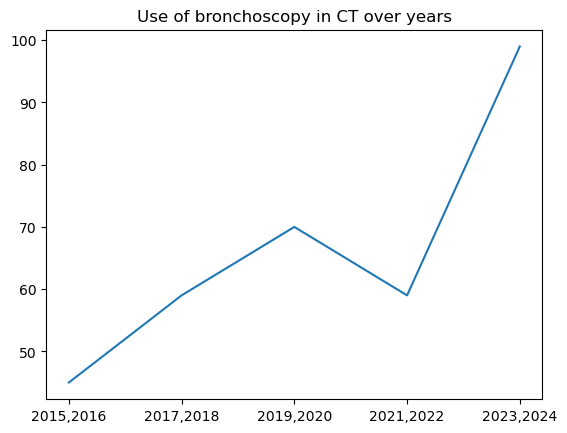

In [28]:
plot=sns.lineplot(y=bronch_values,x=np.linspace(0,1,5))
plot.set_xticks(np.linspace(0,1,5))
plot.set_xticklabels(years)
plot.set(title='Use of bronchoscopy in CT over years')

In [30]:
search='+AND+SEARCH[Study](AREA[EligibilityCriteria]arthroscopy+AND+AREA[CompletionDate]RANGE['
ar_values=[]
for year in years:
    ar_values.append(int(pd.read_xml(url+search+year+params).NStudiesFound.dropna()))
ar_values

[47, 41, 69, 61, 84]

[Text(0.5, 1.0, 'Use of arthroscopy in CT over years')]

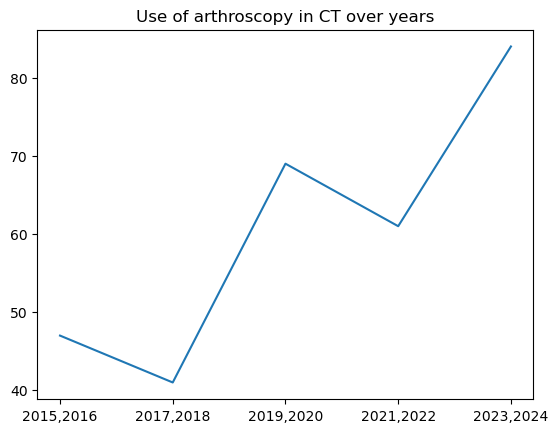

In [31]:
plot=sns.lineplot(y=ar_values,x=np.linspace(0,1,5))
plot.set_xticks(np.linspace(0,1,5))
plot.set_xticklabels(years)
plot.set(title='Use of arthroscopy in CT over years')

In [32]:
search='+AND+SEARCH[Study](AREA[EligibilityCriteria]cystoscopy+AND+AREA[CompletionDate]RANGE['
cy_values=[]
for year in years:
    cy_values.append(int(pd.read_xml(url+search+year+params).NStudiesFound.dropna()))
cy_values

[15, 25, 39, 30, 36]

[Text(0.5, 1.0, 'Use of cystoscopy in CT cystoscopy')]

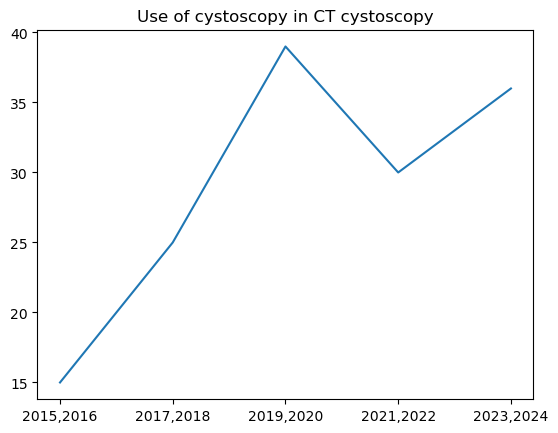

In [33]:
plot=sns.lineplot(y=cy_values,x=np.linspace(0,1,5))
plot.set_xticks(np.linspace(0,1,5))
plot.set_xticklabels(years)
plot.set(title='Use of cystoscopy in CT cystoscopy')

In [34]:
search='+AND+SEARCH[Study](AREA[EligibilityCriteria]hysteroscopy+AND+AREA[CompletionDate]RANGE['
hy_values=[]
for year in years:
    hy_values.append(int(pd.read_xml(url+search+year+params).NStudiesFound.dropna()))
hy_values

[29, 31, 33, 34, 38]

[Text(0.5, 1.0, 'Use hysteroscopy in CT over years')]

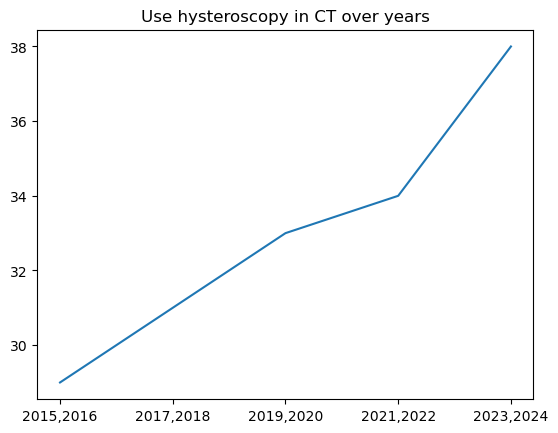

In [35]:
plot=sns.lineplot(y=hy_values,x=np.linspace(0,1,5))
plot.set_xticks(np.linspace(0,1,5))
plot.set_xticklabels(years)
plot.set(title='Use hysteroscopy in CT over years')

In [41]:
url = 'https://clinicaltrials.gov/api/query/study_fields?'
params = '&expr=ALL+AND+AREA[CompletionDate]RANGE[2019,MAX]&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
fields = '&fields=OverallStatus'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())

['Recruiting' 'Completed' 'Not yet recruiting' 'Enrolling by invitation']


In [51]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]recruiting)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())

['Recruiting']


In [71]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]NOT+completed+AND+AREA[OverallStatus]NOT+invitation)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())

['Recruiting' 'Not yet recruiting']


In [189]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]re)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())
# 2 letter search

[]


In [187]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]unk)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())
#first 3 letters search

['Unknown status']


In [190]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]ing)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())
#last 3 letters search

[]


In [191]:
params='&expr=ALL+AND+SEARCH[Study](AREA[OverallStatus]cru)&min_rnk=1&max_rank=1000&fmt=csv&NStudiesFound'
df = pd.read_csv(url + params + fields,skiprows=10)
print(df['OverallStatus'].unique())
#middle 3 letter search

[]


In [38]:
scans=['endoscopy','CT','ultrasound','MRI','X-ray','fluoroscopy','PET']
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
scan_values=[]
for scan in scans:
    scan_values.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_date+params).NStudiesFound.dropna()))
scan_values
#Using Ct-Scans instead of CT returns 14,876 results instead of 15,305 ... seems legit

[4055, 15305, 6394, 20185, 5607, 84, 4472]

[Text(0.5, 1.0, 'Different types of scans used in clinical trials (>2019)')]

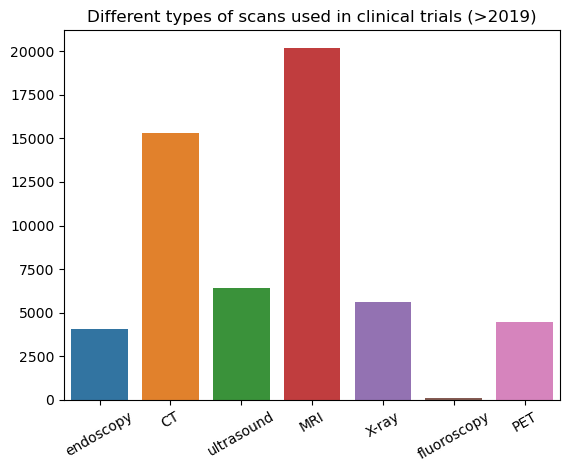

In [65]:
plot=sns.barplot(x=scans, y=scan_values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plot.set(title='Different types of scans used in clinical trials (>2019)')

In [80]:
scans=['endoscopy','CT','ultrasound','MRI','X-ray','fluoroscopy','PET']
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_status='+AND+AREA[OverallStatus]'
params=')&field=Condition&fmt=xml'
scan_values_in_progress, scan_values_completed, scan_values_unknown =[],[],[]
for scan in scans:
    scan_values_in_progress.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_status+
                                                   'NOT+completed+AND+AREA[OverallStatus]NOT+unknown'
                                                   +params).NStudiesFound.dropna()))
    scan_values_completed.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_status+
                                                   'completed'+params).NStudiesFound.dropna()))
    scan_values_unknown.append(int(pd.read_xml(url_all+search_elig_crit+scan+search_status+
                                                   'unknown'+params).NStudiesFound.dropna()))
print(scan_values_in_progress,scan_values_completed,scan_values_unknown,sep='\n')

[2848, 12078, 4371, 15733, 3975, 67, 3716]
[3091, 9846, 4688, 13007, 6149, 57, 2167]
[1091, 3366, 1782, 3894, 1293, 18, 622]


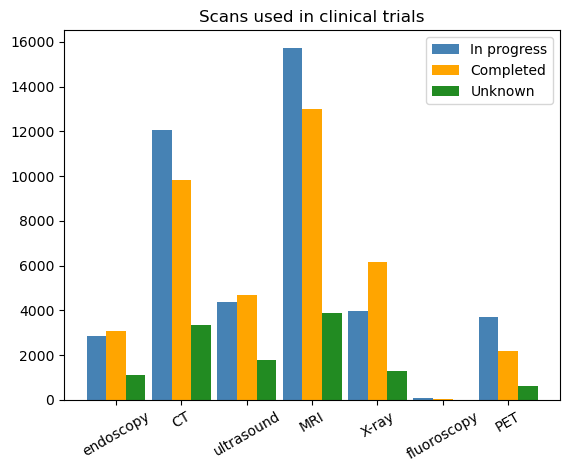

In [102]:
x=np.arange(len(scans))
plt.bar(x-0.3,scan_values_in_progress , 0.3, label = 'In progress',color='steelblue')
plt.bar(x, scan_values_completed, 0.3, label = 'Completed',color='orange')
plt.bar(x+0.3, scan_values_unknown, 0.3, label = 'Unknown',color='forestgreen')
plt.xticks(x,scans,rotation=30)
plt.title('Scans used in clinical trials')
plt.legend()
plt.show()

In [174]:
years=range(2016,2024)
search_elig_crit='+AND+SEARCH[Study](AREA[EligibilityCriteria]'
search_status_date='+AND+AREA[OverallStatus]NOT+unknown+AND+AREA[CompletionDate]'
params=')&field=Condition&fmt=xml'

scans_over_time=np.zeros((len(scans),len(years)))
i=0
for i in range(len(scans)):
    for year in years:
        scans_over_time[i][year-2016]=int(pd.read_xml(url_all+search_elig_crit+scans[i]+
                                                  search_status_date+str(year)+params).NStudiesFound.dropna())

scans_over_time

array([[2.500e+02, 2.960e+02, 3.070e+02, 3.280e+02, 2.890e+02, 2.860e+02,
        3.910e+02, 6.070e+02],
       [8.100e+02, 8.320e+02, 8.580e+02, 9.640e+02, 1.026e+03, 1.043e+03,
        1.281e+03, 2.156e+03],
       [3.930e+02, 4.010e+02, 4.270e+02, 4.830e+02, 4.890e+02, 4.890e+02,
        5.930e+02, 1.014e+03],
       [1.210e+03, 1.230e+03, 1.354e+03, 1.420e+03, 1.398e+03, 1.322e+03,
        1.661e+03, 2.951e+03],
       [4.450e+02, 4.370e+02, 4.560e+02, 5.050e+02, 5.000e+02, 5.840e+02,
        5.830e+02, 9.090e+02],
       [2.000e+00, 5.000e+00, 7.000e+00, 5.000e+00, 6.000e+00, 6.000e+00,
        8.000e+00, 1.000e+01],
       [2.300e+02, 2.320e+02, 2.250e+02, 2.870e+02, 2.620e+02, 2.590e+02,
        3.370e+02, 6.820e+02]])

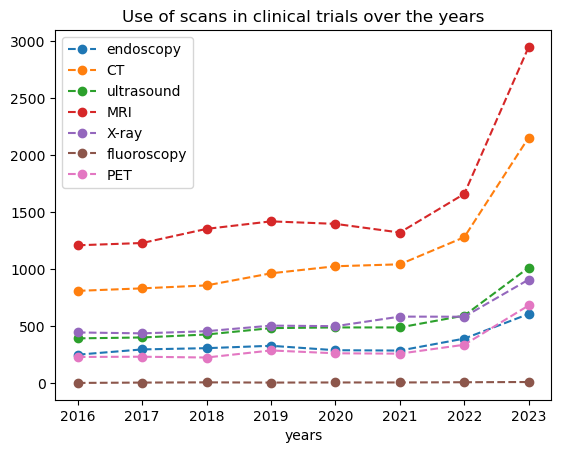

In [19]:
i=0
for scan_type in scans_over_time:
    plt.plot(scan_type,label=scans[i],marker='o',linestyle='--')
    i=i+1
plt.legend()
plt.title('Use of scans in clinical trials over the years')
plt.xlabel('years')
plt.xticks(np.arange(len(years)),years)
plt.show()

In [4]:
body_parts=['brain','heart','liver','eye','stomach','lung','kidney']
url_all='https://classic.clinicaltrials.gov/api/query/field_values?expr=ALL'
search_description='+AND+SEARCH[Study](AREA[DetailedDescription]'
search_date='+AND+AREA[CompletionDate]RANGE[2019,MAX])'
params='&field=Condition&fmt=xml'
body_part_values=[]
for body_part in body_parts:
    body_part_values.append(int(pd.read_xml(url_all+search_description+body_part+search_date+params).NStudiesFound.dropna()))
body_part_values

[11279, 17174, 6163, 4667, 3226, 11503, 8124]

[Text(0.5, 1.0, 'Body parts targeted in clinical trials (>2019)')]

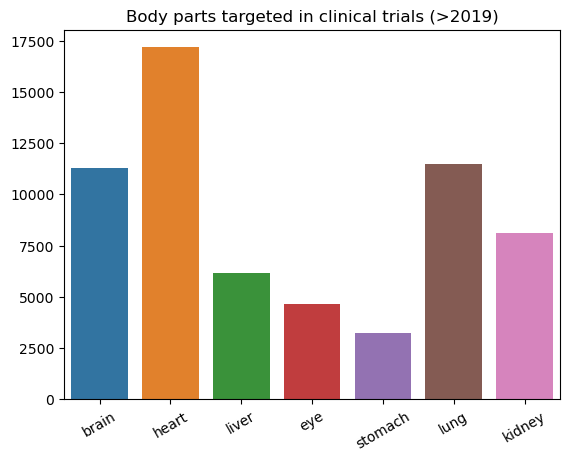

In [10]:
plot=sns.barplot(x=body_parts, y=body_part_values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plot.set(title='Body parts targeted in clinical trials (>2019)')

In [13]:
years=range(2016,2024)
search_description='+AND+SEARCH[Study](AREA[DetailedDescription]'
search_status_date='+AND+AREA[OverallStatus]NOT+unknown+AND+AREA[CompletionDate]'
params=')&field=Condition&fmt=xml'

body_over_time=np.zeros((len(body_parts),len(years)))
i=0
for i in range(len(body_parts)):
    for year in years:
        body_over_time[i][year-2016]=int(pd.read_xml(url_all+search_description+body_parts[i]+
                                                  search_status_date+str(year)+params).NStudiesFound.dropna())

body_over_time

array([[ 681.,  788.,  858.,  961.,  870.,  853., 1100., 1870.],
       [1253., 1346., 1485., 1593., 1567., 1508., 1861., 2908.],
       [ 416.,  410.,  493.,  522.,  516.,  486.,  619.,  958.],
       [ 331.,  405.,  410.,  483.,  430.,  438.,  567.,  800.],
       [ 233.,  230.,  256.,  298.,  264.,  269.,  340.,  445.],
       [ 699.,  729.,  880.,  958., 1026.,  993., 1181., 1825.],
       [ 557.,  598.,  640.,  685.,  731.,  704.,  832., 1278.]])

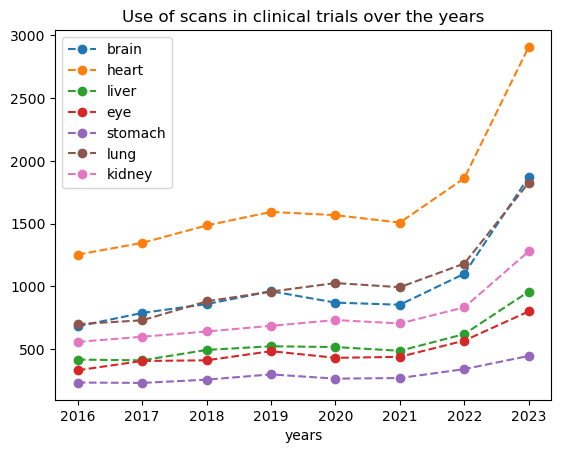

In [16]:
i=0
for body_part in body_over_time:
    plt.plot(body_part,label=body_parts[i],marker='o',linestyle='--')
    i=i+1
plt.legend()
plt.title('Use of scans in clinical trials over the years')
plt.xlabel('years')
plt.xticks(np.arange(len(years)),years)
plt.show()

In [20]:
body_parts=['brain','heart','liver','eye','stomach','lung','kidney']
search_description='+AND+SEARCH[Study](AREA[DetailedDescription]'
search_elig_crit='+AND+AREA[EligibilityCriteria]'
params='&field=Condition&fmt=xml'
body_part_values_endoscopy=[]
body_part_values_MRI=[]
body_part_values_CT=[]
body_part_values_ultrasound=[]
for body_part in body_parts:
    body_part_values_endoscopy.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'endoscopy'+search_date+params).NStudiesFound.dropna()))
    body_part_values_MRI.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'MRI'+search_date+params).NStudiesFound.dropna()))
    body_part_values_CT.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'CT'+search_date+params).NStudiesFound.dropna()))
    body_part_values_ultrasound.append(int(pd.read_xml(url_all+search_description+body_part+search_elig_crit+
                                                      'ultrasound'+search_date+params).NStudiesFound.dropna()))
    
print(body_part_values_MRI,body_part_values_endoscopy,body_part_values_CT,body_part_values_ultrasound,sep='\n')

[3403, 1167, 767, 242, 241, 866, 561]
[59, 110, 221, 38, 482, 113, 101]
[801, 695, 609, 94, 371, 1476, 550]
[211, 423, 419, 66, 129, 320, 224]


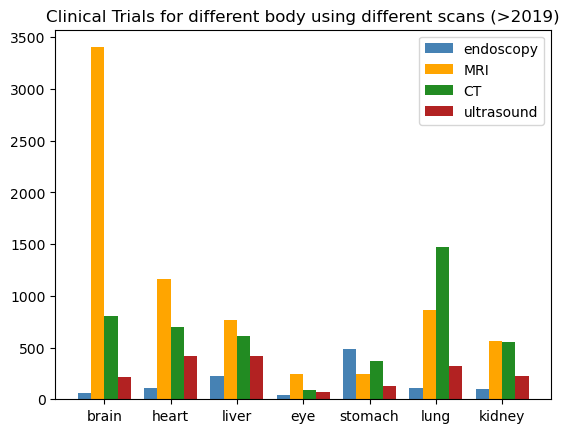

In [24]:
x=np.arange(len(body_parts))
plt.bar(x-0.3,body_part_values_endoscopy,0.2,label='endoscopy',color='steelblue')
plt.bar(x-0.1,body_part_values_MRI,0.2,label='MRI',color='orange')
plt.bar(x+0.1,body_part_values_CT,0.2,label='CT',color='forestgreen')
plt.bar(x+0.3,body_part_values_ultrasound,0.2,label='ultrasound',color='firebrick')
plt.xticks(x,body_parts)
plt.title('Clinical Trials for different body using different scans (>2019)')
plt.legend()
plt.show()